## Best Practices for Data Preprocessing

#### Always Explore & Visualize Data First

In [59]:
# Task 1: Summary Statistics





# Task 2: Visualize Data Distribution





# Task 3: Checking for Null Values




In [60]:


def summary_statistics(df):
    """
    Prints summary statistics for the dataset.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame
        
    Returns:
        None
    """
    print("Summary Statistics:")
    print(df.describe(include='all'))  # include='all' to summarize numeric & categorical


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_distribution(df, columns):
    """
    Visualize data distribution for specified columns using histograms and boxplots.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame
        columns (list): List of column names to plot
        
    Returns:
        None
    """
    for col in columns:
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Histogram of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        
        plt.show()


In [62]:
def check_null_values(df):
    """
    Check and print the count of null values in each column.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame
        
    Returns:
        None
    """
    null_counts = df.isnull().sum()
    print("Null Values in Each Column:")
    print(null_counts[null_counts > 0])


Summary Statistics:
              Age        Income Gender
count    4.000000      4.000000      5
unique        NaN           NaN      2
top           NaN           NaN      F
freq          NaN           NaN      3
mean    29.250000  55000.000000    NaN
std      7.889867   4760.952286    NaN
min     22.000000  50000.000000    NaN
25%     24.250000  51500.000000    NaN
50%     27.500000  55000.000000    NaN
75%     32.500000  58500.000000    NaN
max     40.000000  60000.000000    NaN


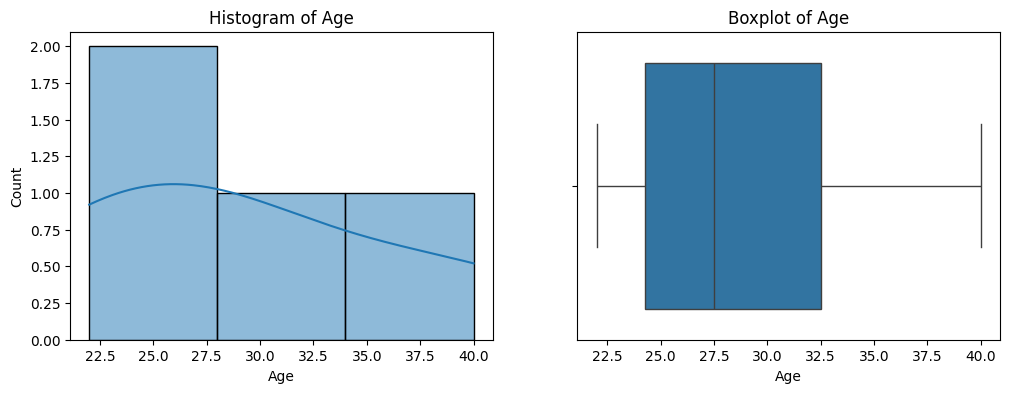

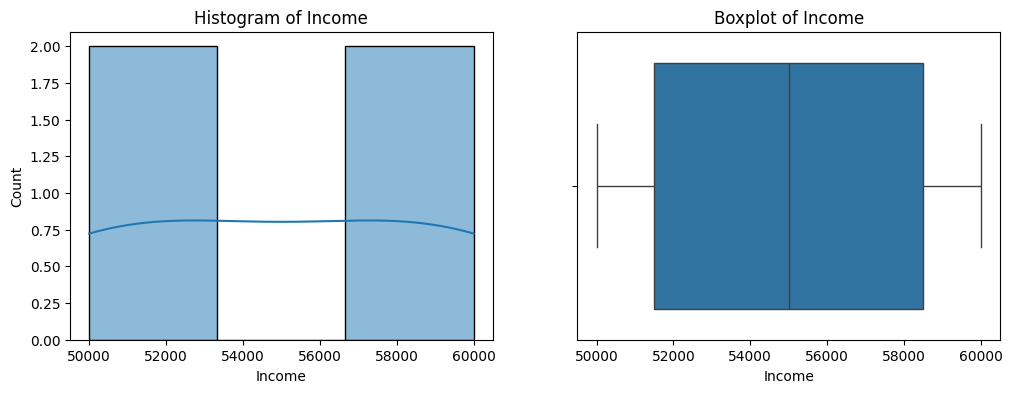

Null Values in Each Column:
Age       1
Income    1
dtype: int64


In [63]:
import pandas as pd

# Sample DataFrame
data = {
    'Age': [25, 30, None, 22, 40],
    'Income': [50000, None, 60000, 52000, 58000],
    'Gender': ['M', 'F', 'M', 'F', 'F']
}
df = pd.DataFrame(data)

summary_statistics(df)
visualize_distribution(df, ['Age', 'Income'])
check_null_values(df)


## Handle Missing & Inconsistent Data Before Applying ML Models

In [64]:
# Task 4: Drop Missing Values





# Task 5: Fill Missing Values




# Task 6: Handling Outliers with Capping





In [65]:
def fill_missing_values(df, column, method='mean', value=None):
    """
    Fill missing values in a column using mean, median, mode, or a custom value.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame
        column (str): Column name to fill missing values in
        method (str): 'mean', 'median', 'mode', or 'value' (default 'mean')
        value: Custom value to fill with if method='value'
    
    Returns:
        pd.DataFrame: DataFrame with missing values filled in the specified column
    """
    if method == 'mean':
        fill_val = df[column].mean()
    elif method == 'median':
        fill_val = df[column].median()
    elif method == 'mode':
        fill_val = df[column].mode()[0]
    elif method == 'value':
        fill_val = value
    else:
        raise ValueError("Method must be one of: 'mean', 'median', 'mode', 'value'")
    
    df[column] = df[column].fillna(fill_val)
    return df


In [66]:
def cap_outliers_iqr(df, column):
    """
    Caps outliers in a column using the IQR method (winsorization).
    
    Parameters:
        df (pd.DataFrame): Input DataFrame
        column (str): Column name to cap outliers
    
    Returns:
        pd.DataFrame: DataFrame with capped outliers in the specified column
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df


In [67]:
import pandas as pd

# Task 4: Drop Missing Values
def drop_missing_values(df):
    """
    Drops all rows with any missing values.
    """
    return df.dropna()

# Task 5: Fill Missing Values
def fill_missing_values(df, column, method='mean', value=None):
    """
    Fill missing values in a column using mean, median, mode, or a custom value.
    """
    if method == 'mean':
        fill_val = df[column].mean()
    elif method == 'median':
        fill_val = df[column].median()
    elif method == 'mode':
        fill_val = df[column].mode()[0]
    elif method == 'value':
        fill_val = value
    else:
        raise ValueError("Method must be one of: 'mean', 'median', 'mode', 'value'")
    
    df[column] = df[column].fillna(fill_val)
    return df

# Task 6: Handling Outliers with Capping (Winsorization)
def cap_outliers_iqr(df, column):
    """
    Caps outliers in a column using the IQR method.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df


# Sample DataFrame with missing values and outliers
data = {
    'Age': [25, 30, None, 22, 40, 1000],
    'Income': [50000, None, 60000, 52000, 58000, 1500000],
    'Gender': ['M', 'F', 'M', 'F', 'F', 'M']
}
df = pd.DataFrame(data)

print("Original Data:")
print(df)

# Task 4: Drop rows with missing values
df_dropped = drop_missing_values(df.copy())
print("\nAfter Dropping Missing Values:")
print(df_dropped)

# Task 5: Fill missing values (Age with mean)
df_filled = fill_missing_values(df.copy(), 'Age', method='mean')
print("\nAfter Filling Missing Age with Mean:")
print(df_filled)

# Task 6: Cap outliers in Income
df_capped = cap_outliers_iqr(df.copy(), 'Income')
print("\nAfter Capping Outliers in Income:")
print(df_capped)


Original Data:
      Age     Income Gender
0    25.0    50000.0      M
1    30.0        NaN      F
2     NaN    60000.0      M
3    22.0    52000.0      F
4    40.0    58000.0      F
5  1000.0  1500000.0      M

After Dropping Missing Values:
      Age     Income Gender
0    25.0    50000.0      M
3    22.0    52000.0      F
4    40.0    58000.0      F
5  1000.0  1500000.0      M

After Filling Missing Age with Mean:
      Age     Income Gender
0    25.0    50000.0      M
1    30.0        NaN      F
2   223.4    60000.0      M
3    22.0    52000.0      F
4    40.0    58000.0      F
5  1000.0  1500000.0      M

After Capping Outliers in Income:
      Age   Income Gender
0    25.0  50000.0      M
1    30.0      NaN      F
2     NaN  60000.0      M
3    22.0  52000.0      F
4    40.0  58000.0      F
5  1000.0  72000.0      M


## Choose the Right Scaling Method

In [68]:
# Task 7: Min-Max Scaling







# Task 8: Robust Scaling






# Task 9: MaxAbs Scaling






In [69]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler
import pandas as pd

# Sample data
data = {
    'Age': [25, 30, 22, 40, 35],
    'Income': [50000, 60000, 52000, 58000, 57000]
}
df = pd.DataFrame(data)

# Task 7: Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[['Age', 'Income']] = scaler_minmax.fit_transform(df_minmax[['Age', 'Income']])
print("Min-Max Scaled Data:")
print(df_minmax)


# Task 8: Robust Scaling
scaler_robust = RobustScaler()
df_robust = df.copy()
df_robust[['Age', 'Income']] = scaler_robust.fit_transform(df_robust[['Age', 'Income']])
print("\nRobust Scaled Data:")
print(df_robust)


# Task 9: MaxAbs Scaling
scaler_maxabs = MaxAbsScaler()
df_maxabs = df.copy()
df_maxabs[['Age', 'Income']] = scaler_maxabs.fit_transform(df_maxabs[['Age', 'Income']])
print("\nMaxAbs Scaled Data:")
print(df_maxabs)


Min-Max Scaled Data:
        Age  Income
0  0.166667     0.0
1  0.444444     1.0
2  0.000000     0.2
3  1.000000     0.8
4  0.722222     0.7

Robust Scaled Data:
   Age    Income
0 -0.5 -1.166667
1  0.0  0.500000
2 -0.8 -0.833333
3  1.0  0.166667
4  0.5  0.000000

MaxAbs Scaled Data:
     Age    Income
0  0.625  0.833333
1  0.750  1.000000
2  0.550  0.866667
3  1.000  0.966667
4  0.875  0.950000


## Keep Track of Data Transformations for Reproducibility

In [70]:
# Task 10: Log Data Preprocessing Steps






# Task 11: Store Transformation Parameters






In [71]:
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')

def log_step(step_description):
    logging.info(step_description)

# Example usage:
log_step("Loaded dataset with 1000 rows and 10 columns.")
log_step("Performed Min-Max Scaling on 'Age' and 'Income' columns.")
log_step("Handled missing values using mean imputation.")


2025-05-27 14:16:11,171 - Loaded dataset with 1000 rows and 10 columns.
2025-05-27 14:16:11,174 - Performed Min-Max Scaling on 'Age' and 'Income' columns.
2025-05-27 14:16:11,176 - Handled missing values using mean imputation.
